# Result Analyes 1 - Linear, FM, AFM, Crossnet, CIN, DeepFM

In [1]:
%load_ext autoreload
%autoreload 2

import os
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath('..'))
# ---------------------------------
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import roc_auc_score
# ---------------------------------

In [2]:
train_df = pd.read_csv('../data/train.csv', index_col='id')
y_train = train_df['target'].values
print(y_train.shape)

(600000,)


In [3]:
def plot(mdf, y):
    plt.figure(figsize=[15, 15])
    seaborn.heatmap(mdf.corr(), annot=True)
    plt.show()
    for col in mdf.columns:
        auc_score = roc_auc_score(y, mdf[col].values)
        print(col, ': ', auc_score)

def show(mdict, y):
    for name, path in mdict.items():
        marr = np.load(path)
        mdf = pd.DataFrame(data=marr, columns=[f'{name}{i}' for i in range(marr.shape[1])])
        plot(mdf, y)
        del marr, mdf

In [4]:
! ls ../tmp/lr

0.pkl  2432137157.csv	      2432137157stacking1.npy  3.pkl
1.pkl  2432137157predict.npy  2.pkl		       4.pkl


In [5]:
! ls ../tmp/fm

3366580204.csv	3366580204predict.npy  3366580204stacking1.npy


In [6]:
! ls ../tmp/afm

1372484291.csv	1372484291predict.npy  1372484291stacking1.npy


In [7]:
! ls ../tmp/cross

2072349059.csv	2072349059predict.npy  2072349059stacking1.npy


In [8]:
! ls ../tmp/cin

1960993645.csv	1960993645predict.npy  1960993645stacking1.npy


In [9]:
! ls ../tmp/deepfm/

03051921.csv  1615107092predict.npy  1615107092stacking1.npy


In [10]:
mdict = {
    'lr': '../tmp/lr/2432137157stacking1.npy',
    'fm': '../tmp/fm/3366580204stacking1.npy',
    'afm': '../tmp/afm/1372484291stacking1.npy',
    'cross': '../tmp/cross/2072349059stacking1.npy',
    'cin': '../tmp/cin/1960993645stacking1.npy',
    'deepfm': '../tmp/deepfm/1615107092stacking1.npy'
}

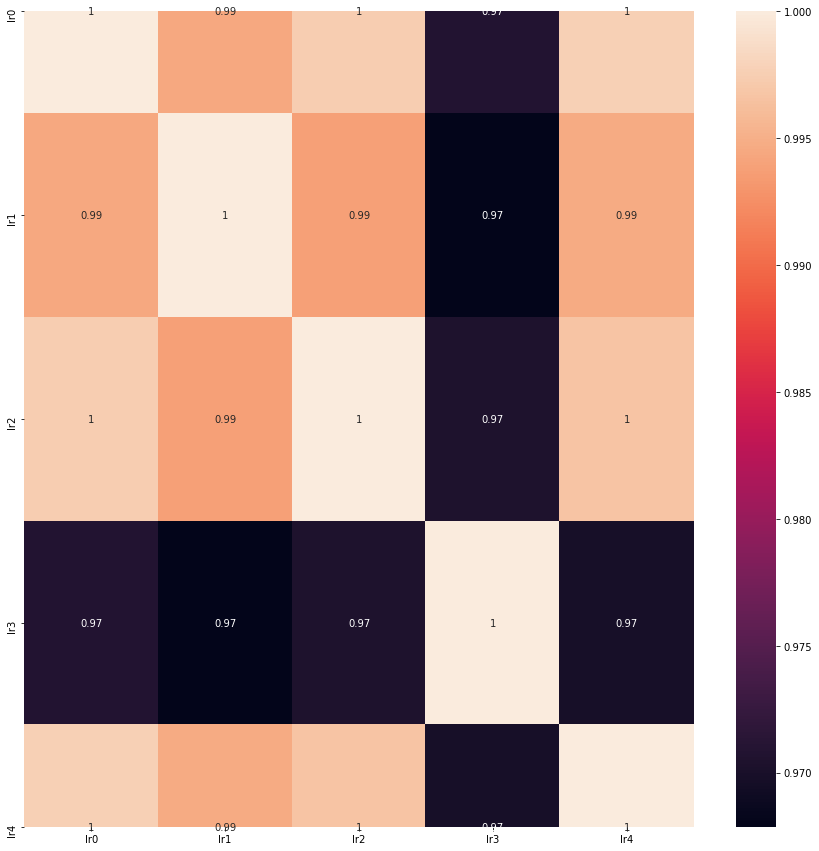

lr0 :  0.7871008309102423
lr1 :  0.786181681511498
lr2 :  0.7870923834852853
lr3 :  0.7879263674636685
lr4 :  0.7869980389414709


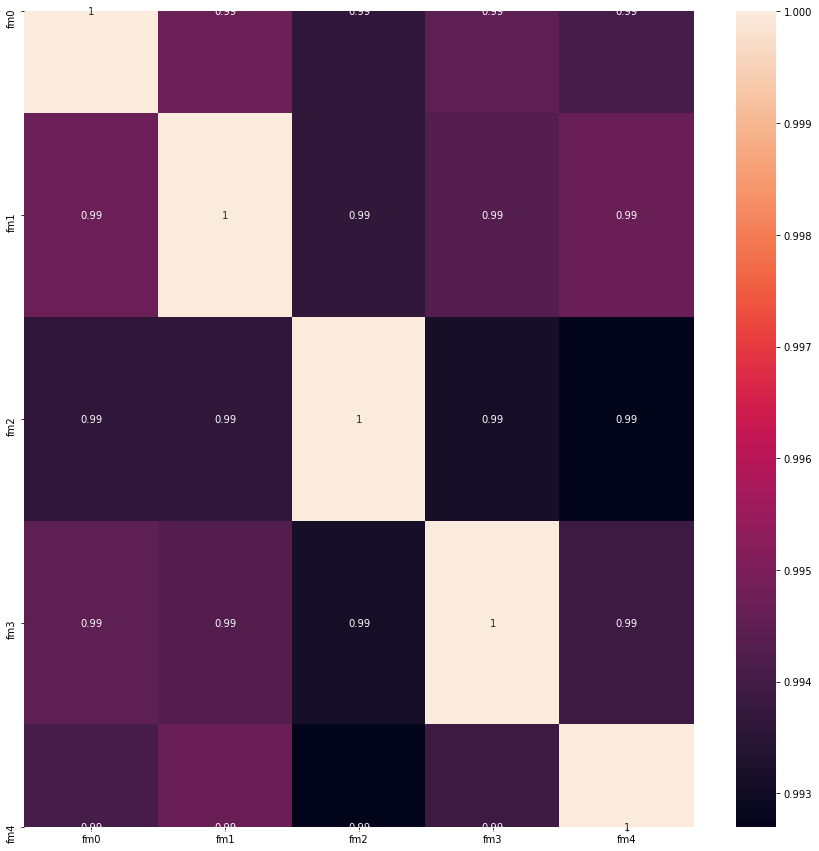

fm0 :  0.7864492156874526
fm1 :  0.7865213210550244
fm2 :  0.7866407368766328
fm3 :  0.786699694500051
fm4 :  0.7865378575085887


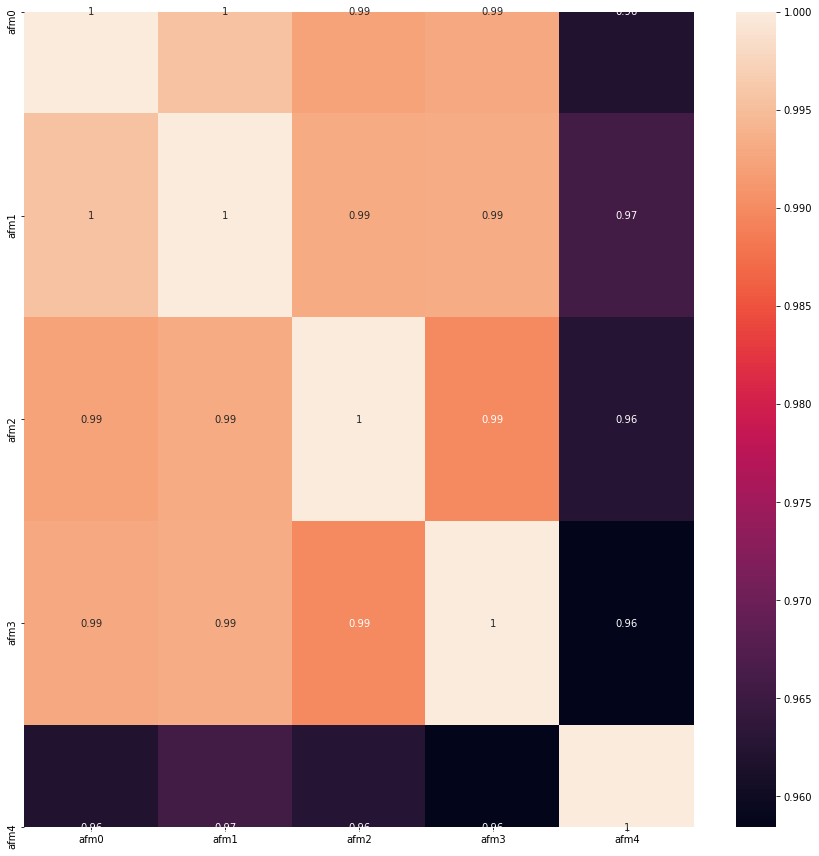

afm0 :  0.7881432652576061
afm1 :  0.7884266945453285
afm2 :  0.787658402498296
afm3 :  0.7873528486346305
afm4 :  0.788052569968878


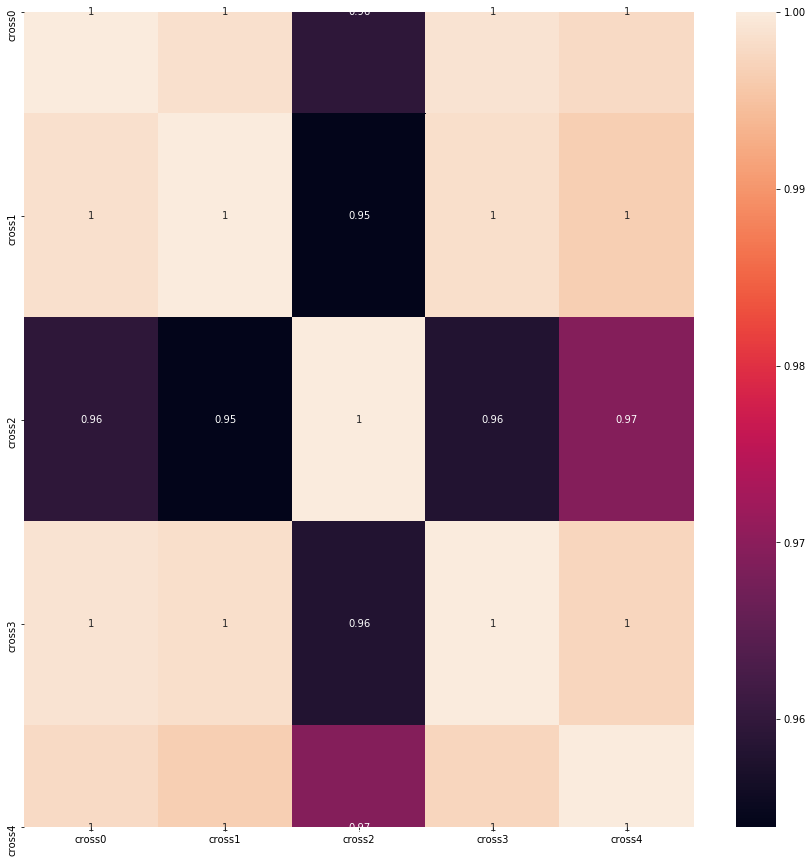

cross0 :  0.789070686059628
cross1 :  0.7890998712736759
cross2 :  0.788422695181991
cross3 :  0.7886936828477887
cross4 :  0.7889011509676058


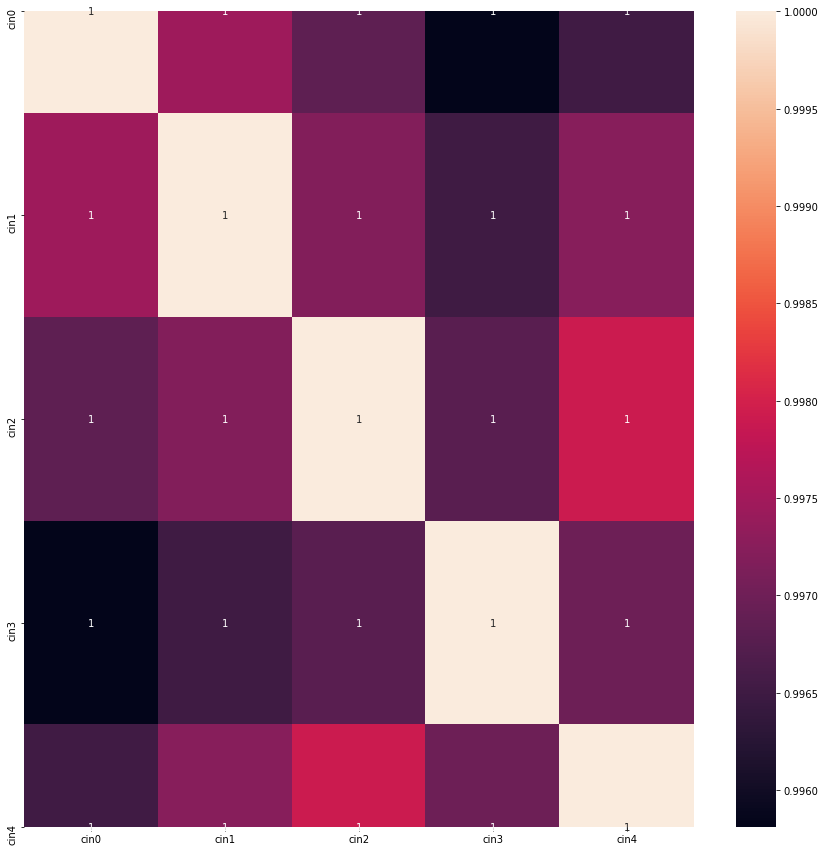

cin0 :  0.7893075830982641
cin1 :  0.7893201043607796
cin2 :  0.7894061582871676
cin3 :  0.7893148253534268
cin4 :  0.789430463783031


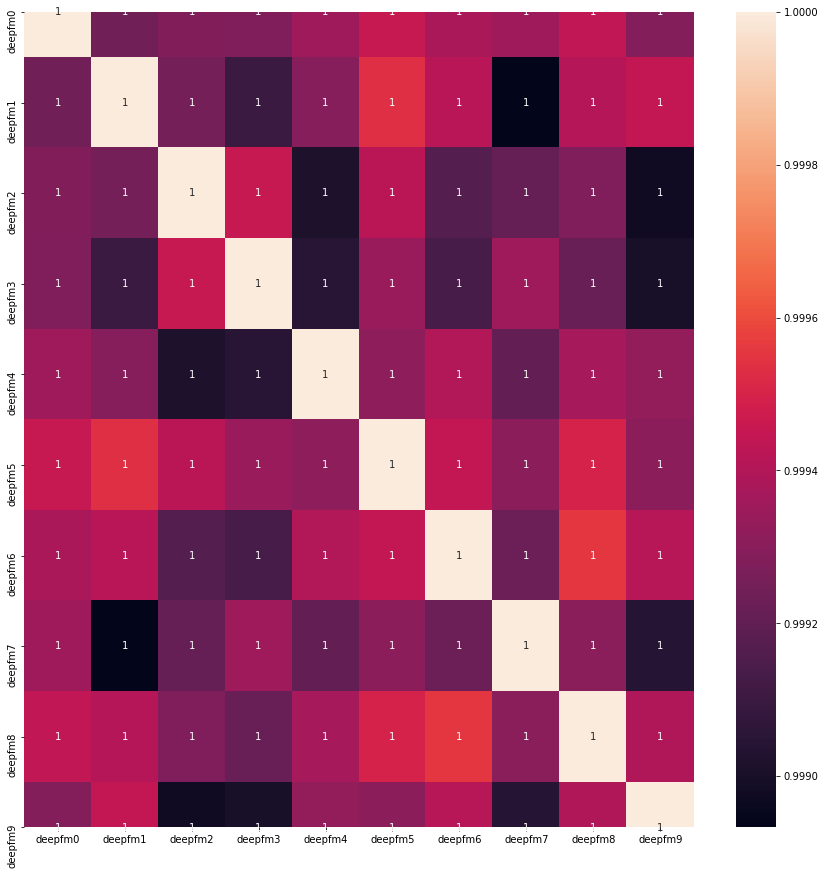

deepfm0 :  0.7892366064820309
deepfm1 :  0.7892854497321906
deepfm2 :  0.789143660509138
deepfm3 :  0.7890413407794032
deepfm4 :  0.7892470043210248
deepfm5 :  0.789250012270826
deepfm6 :  0.7892239498442034
deepfm7 :  0.7891573962975055
deepfm8 :  0.7892537104056099
deepfm9 :  0.7892455132483565


In [11]:
show(mdict, y_train)

结论： 我们应该平均 (deepfm, cin, fm) 并且分开 (cross2, lr3)

In [ ]:
def mk_mdf(mdict, rule_dict={}):
    df = list()
    for name, path in mdict.items():
        marr = np.load(path)
        df.append(pd.DataFrame(data=marr, columns=[f'{name}{i}' for i in range(marr.shape[1])]))
    df = pd.concat(df, axis=1)
    
    mdf = dict()
    for colname, rules in rule_dict.items():
        values = np.mean(df[rules].values, axis=1)
        mdf[colname] = values
    return pd.DataFrame(mdf)

In [13]:
rule_dict = {
    'deepfm': [f'deepfm{i}' for i in range(10)],
    'cin':  [f'cin{i}' for i in range(5)],
    'fm':  [f'fm{i}' for i in range(5)],
    'cross1': ['cross0', 'cross1', 'cross3', 'cross4'],
    'cross2': ['cross2'],
    'lr': ['lr0', 'lr1', 'lr2', 'lr4'],
    'lr2': ['lr3']
}

In [14]:
mdf = mk_mdf(mdict, rule_dict)

In [15]:
mdf.head()

,deepfm,cin,fm,cross1,cross2,lr,lr2
0,0.050058,0.177138,0.060259,0.183906,0.056689,0.079158,0.186451
1,0.093963,0.218902,0.098619,0.226080,0.095707,0.117495,0.228949
2,0.267521,0.320728,0.233458,0.317402,0.278393,0.236362,0.300159
3,0.023307,0.135259,0.026578,0.134532,0.022674,0.030009,0.153205
4,0.115008,0.242454,0.126367,0.241376,0.120123,0.116767,0.236808


In [17]:
mdf.corr()

,deepfm,cin,fm,cross1,cross2,lr,lr2
deepfm,1.000000,0.961055,0.987938,0.963647,0.996089,0.991851,0.967526
cin,0.961055,1.000000,0.928160,0.996887,0.954160,0.953513,0.990848
fm,0.987938,0.928160,1.000000,0.934971,0.991731,0.987689,0.943908
cross1,0.963647,0.996887,0.934971,1.000000,0.960852,0.961698,0.995164
cross2,0.996089,0.954160,0.991731,0.960852,1.000000,0.995497,0.965995
lr,0.991851,0.953513,0.987689,0.961698,0.995497,1.000000,0.971270
lr2,0.967526,0.990848,0.943908,0.995164,0.965995,0.971270,1.000000


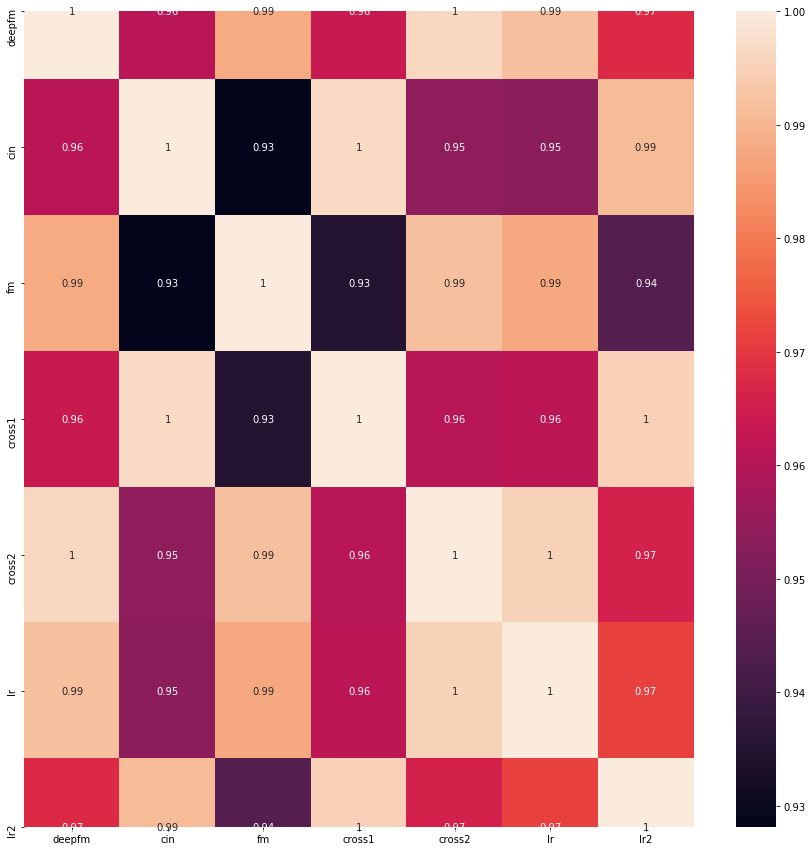

deepfm :  0.7892806766730666
cin :  0.7896529162183513
fm :  0.7873362279035219
cross1 :  0.7890655263442959
cross2 :  0.788422695181991
lr :  0.7872171390419083
lr2 :  0.7879263674636685


In [16]:
plot(mdf, y_train)